In [1]:
#libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#loading data
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
#cleaning
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#filtering for data scientist jobs
df_DS =df[df['job_title'].str.contains('data scientist', case=False, na=False)].copy()

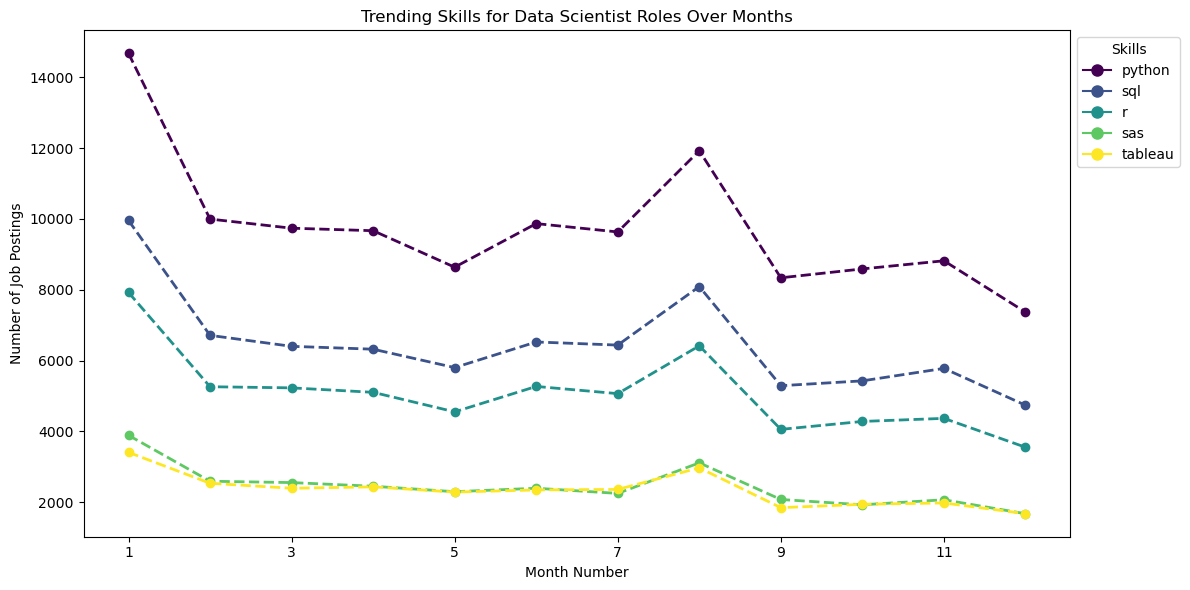

In [42]:
#pivot table for skills by month
df_DS['job_posted_month_no'] = df_DS['job_posted_date'].dt.month
df_DS_exploded = df_DS.explode('job_skills').reset_index(drop=True)
df_DS_pivot = df_DS_exploded.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)
df_DS_pivot.loc['Total'] = df_DS_pivot.sum()
df_DS_pivot = df_DS_pivot[df_DS_pivot.loc['Total'].sort_values(ascending=False).index]
df_DS_pivot = df_DS_pivot.drop('Total')

#Plotting
df_DS_pivot.iloc[:, :5].plot(kind='line', figsize=(12, 6), colormap='viridis', marker='o', markersize=8)
plt.title('Trending Skills for Data Scientist Roles Over Months')
plt.xlabel('Month Number')
plt.ylabel('Number of Job Postings')
plt.legend(title='Skills', bbox_to_anchor=(1, 1), loc='upper left')
plt.setp(plt.gca().lines, linestyle='--', linewidth=2, markersize=6)
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Number of Job Postings')

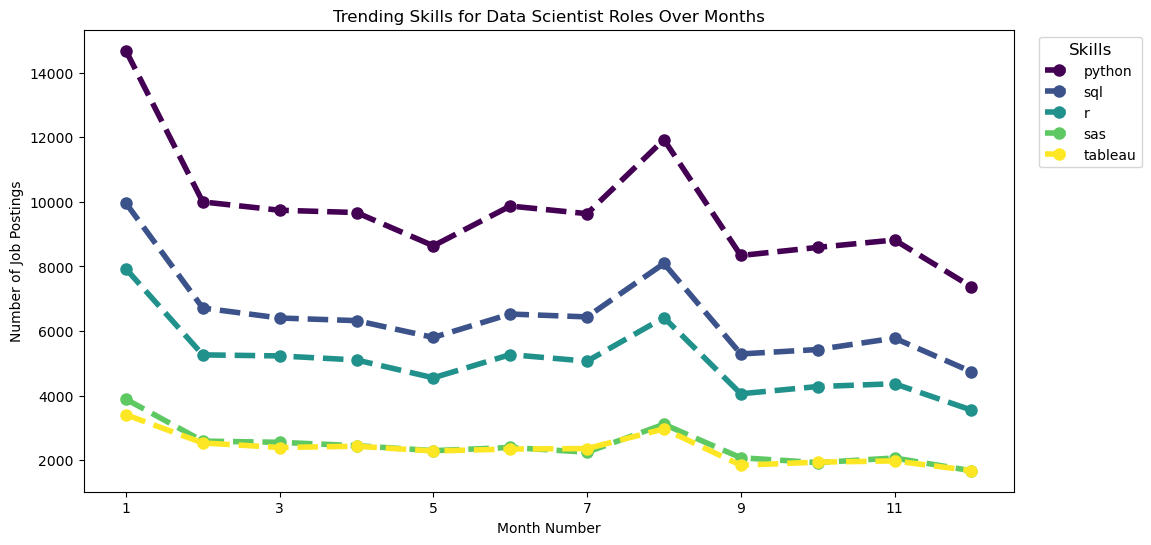

In [53]:
df_DS_pivot.iloc[:, :5].plot(kind='line', figsize=(12, 6),
                             linewidth=4, linestyle='--',
                             colormap='viridis', marker='o',
                             markersize=8                            
)
plt.legend(
    bbox_to_anchor=(1.02, 1),   # push legend outside the plot
    loc='upper left',              # anchor point
    title="Skills",                # optional: add a title
    fontsize=10,                   # adjust text size
    title_fontsize=12              # title size
)
plt.title('Trending Skills for Data Scientist Roles Over Months')
plt.xlabel('Month Number')
plt.ylabel('Number of Job Postings')

